In [1]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat
from matplotlib.collections import PatchCollection

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

In [2]:
DATASET = 'DatasetPro4.0.csv'

Pearson Lipid Correlations

LHC_ICV                 RHC_ICV  \
                                          r       p-Value         r   
SM.41.0.%mol                       0.256701  1.083290e-42  0.264988   
SM.D18.1.23.0..SM.D17.1.24.0.%mol  0.251894  4.024113e-41  0.259875   
SM.D18.0.22.0.%mol                 0.226612  2.089362e-33  0.240324   
SM.D18.2.23.0.%mol                 0.213623  8.639562e-30  0.211516   
FA.22.5.%mol                       0.211817  2.636986e-29  0.200773   
PE.O.16.0.18.2.%mol                0.011772  5.368981e-01  0.019127   
PE.O.16.0.20.3.%mol                0.006171  7.461508e-01  0.013647   
PE.O.16.0.20.4.%mol                0.072955  1.271460e-04  0.076455   
PE.O.16.0.22.4.%mol                0.028490  1.349877e-01  0.034292   
PE.O.16.0.22.6.%mol                0.138677  2.678792e-13  0.138714   
GM3.D18.1.20.0.%mol               -0.158021  7.340699e-17 -0.163427   
LPE.18.2...SN1.%mol               -0.158397  6.191565e-17 -0.139679   
TG.52.4...SIM.%mol                -0.162092  1.137069e-17 -0.171280   
TG.52.3...NL.16.1.%mol            -0.178923  3.026396e-21 -0.201957   
TG.52.4...NL.16.1.%mol            -0.224221  1.006893e-32 -0.237550   

                                                      Age                
                                        p-Value         r       p-Value  
SM.41.0.%mol                       1.773490e-45 -0.221141  7.440628e-32  
SM.D18.1.23.0..SM.D17.1.24.0.%mol  9.535874e-44 -0.206995  4.931395e-28  
SM.D18.0.22.0.%mol                 1.769194e-37 -0.231249  9.381467e-35  
SM.D18.2.23.0.%mol                 3.171282e-29 -0.145355  1.784179e-14  
FA.22.5.%mol                       1.940531e-26 -0.080356  2.422601e-05  
PE.O.16.0.18.2.%mol                3.156601e-01 -0.073130  1.224585e-04  
PE.O.16.0.20.3.%mol                4.740731e-01 -0.105607  2.774389e-08  
PE.O.16.0.20.4.%mol                5.911910e-05 -0.142729  5.257914e-14  
PE.O.16.0.22.4.%mol                7.197275e-02 -0.104562  3.801601e-08  
PE.O.16.0.22.6.%mol                2.639892e-13 -0.142997  4.712276e-14  
GM3.D18.1.20.0.%mol                6.102551e-18  0.131322  4.566315e-12  
LPE.18.2...SN1.%mol                1.799206e-13  0.053972  4.609021e-03  
TG.52.4...SIM.%mol                 1.411118e-19  0.117025  7.288151e-10  
TG.52.3...NL.16.1.%mol             9.737188e-27  0.089404  2.613656e-06  
TG.52.4...NL.16.1.%mol             1.238316e-36  0.133220  2.229250e-12

+-----+-----------------------------------------------+----------------------------+----------------------------+----------------------------+
|     | Feature                                       | LHC_ICV                    | RHC_ICV                    | Age                        |
|-----+-----------------------------------------------+----------------------------+----------------------------+----------------------------|
| 115 | SM.41.0.%mol                                  | (R = 0.2567) (p = 0.0000)  | (R = 0.2650) (p = 0.0000)  | (R = -0.2211) (p = 0.0000) |
| 138 | SM.D18.1.23.0..SM.D17.1.24.0.%mol             | (R = 0.2519) (p = 0.0000)  | (R = 0.2599) (p = 0.0000)  | (R = -0.2070) (p = 0.0000) |
| 131 | SM.D18.0.22.0.%mol                            | (R = 0.2266) (p = 0.0000)  | (R = 0.2403) (p = 0.0000)  | (R = -0.2312) (p = 0.0000) |
| 148 | SM.D18.2.23.0.%mol                            | (R = 0.2136) (p = 0.0000)  | (R = 0.2115) (p = 0.0000)  | (R = -0.1454) (p = 0.0000) |

,Feature,LHC_ICV,RHC_ICV,Age
710,TG.52.4...NL.16.1.%mol,-0.224221,-0.237550,-0.237550
708,TG.52.3...NL.16.1.%mol,-0.178923,-0.201957,-0.201957
652,TG.52.4...SIM.%mol,-0.162092,-0.171280,-0.171280
459,LPE.18.2...SN1.%mol,-0.158397,-0.139679,-0.139679
96,GM3.D18.1.20.0.%mol,-0.158021,-0.163427,-0.163427
344,LPC.P.17.0...B.%mol,0.008416,0.012242,0.012242
768,CE.20.4....OH.%mol,0.009070,0.009467,0.009467
288,LPC.18.0...SN2.%mol,0.009866,0.029052,0.029052
755,TG.O.52.1...NL.16.0.%mol,0.010623,0.016746,0.016746
249,PC.P.16.0.16.1.%mol,0.010709,-0.002734,-0.002734


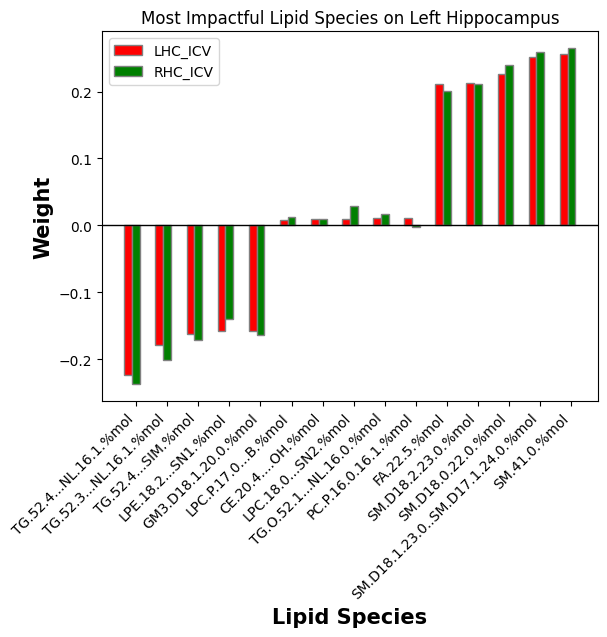

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

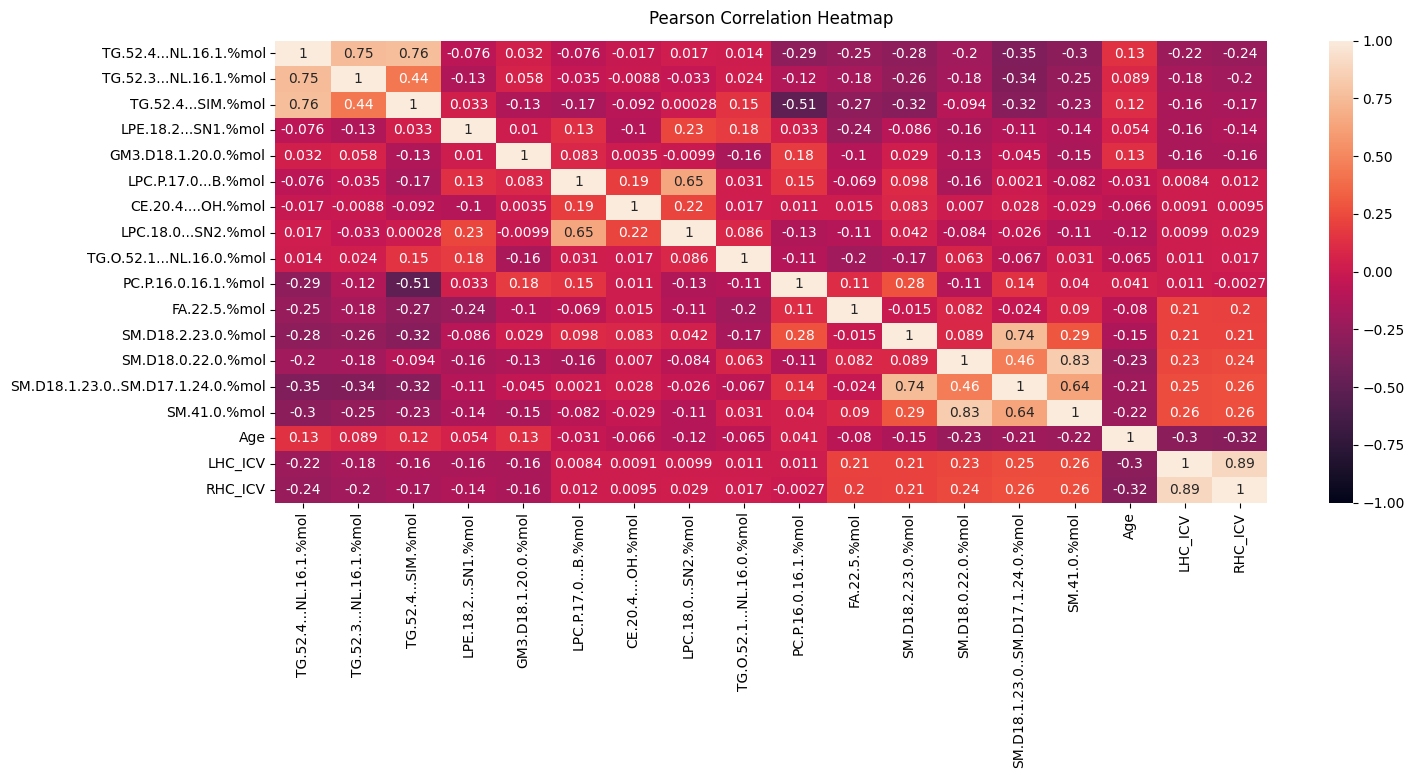

In [4]:
dataset = pd.read_csv(DATASET)
pearson_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'EXAMDATE'])

#-----------------------------------------------------------------------------------------------
styles = [
    dict(selector="th", props=[("font-size", "150%"), ("text-align", "center")]),
    dict(selector="td", props=[("padding", "10px"), ("text-align", "center")]),
]
#-----------------------------------------------------------------------------------------------
columns_list = dataset.columns[858:1639].tolist()
listatotal = []
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
listaAge = dataset['Age']

for feature in dataset.columns[858:1639]:
    lista = []
    # Calculate correlations
    corrL, pL = pearsonr(dataset[feature], listaL)
    corrR, pR = pearsonr(dataset[feature], listaR)
    corrAge, pAge = pearsonr(dataset[feature], listaAge)
    lista.append(corrL),lista.append(pL),lista.append(corrR),lista.append(pR),lista.append(corrAge),lista.append(pAge)
    listatotal.append(lista)


df = pd.DataFrame(listatotal,
                  index=pd.Index(dataset.columns[858:1639].tolist()),
                  columns=pd.MultiIndex.from_product([['LHC_ICV', 'RHC_ICV', 'Age'],['r', 'p-Value']]))
total_rows = df.shape[0]
middle_index = total_rows // 2
start_index = middle_index - 2  # Selecting 2 rows before the middle
end_index = middle_index + 2    # Selecting 2 rows after the middle
selected_rows = df.iloc[start_index:end_index + 1]

df_sorted = df.sort_values(by=('LHC_ICV','r'), ascending=False)

combined_df = pd.concat([df_sorted.head(5),selected_rows, df_sorted.tail(5)])
styled_df = combined_df.style.set_table_styles(styles)
display(combined_df)
#-----------------------------------------------------------------------------------------------
df = pd.DataFrame()

# Assign values to columns in the DataFrame
df['Feature'] = dataset.columns[858:1639]
df['LHC_ICV'] = None
df['RHC_ICV'] = None
df['Age'] = None

# Loop through each feature column and calculate correlations
for feature in df['Feature']:
    # Assuming listaL and listaR are defined somewhere in your code
    listaL = dataset['LHC_ICV']
    listaR = dataset['RHC_ICV']
    listaAge = dataset['Age']

    # Calculate correlations
    corrL, pL = pearsonr(dataset[feature], listaL)
    corrR, pR = pearsonr(dataset[feature], listaR)
    corrAge, pAge = pearsonr(dataset[feature], listaAge)

    # Update the DataFrame with the correlation and p-value
    df.loc[df['Feature'] == feature, 'LHC_ICV'] = f"(R = {corrL:.4f}) (p = {pL:.4f})"
    df.loc[df['Feature'] == feature, 'RHC_ICV'] = f"(R = {corrR:.4f}) (p = {pR:.4f})"
    df.loc[df['Feature'] == feature, 'Age'] = f"(R = {corrAge:.4f}) (p = {pAge:.4f})"
df_sorted = df.sort_values(by='LHC_ICV', ascending=False)
print(tabulate(df_sorted, headers = 'keys', tablefmt = 'psql'))

#--------------------------------------------------------------------------------------

pearson_cor['Feature'] = None
pearson_cor['LHC_ICV'] = None
pearson_cor['RHC_ICV'] = None
pearson_cor['Age'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
listaA = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista4 = []
lista = []

for i in dataset.columns[858:1639]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = pearsonr(lista,listaL)
    corrR, _ = pearsonr(lista,listaR)
    corrA, _ = pearsonr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)
    lista4.append(corrR)

pearson_cor['Feature'] = lista1
pearson_cor['LHC_ICV'] = lista2
pearson_cor['RHC_ICV'] = lista3
pearson_cor['Age'] = lista4
pearson_cor = pearson_cor.sort_values(by='LHC_ICV')

#----------------------------------------------------------------------------
total_rows = pearson_cor.shape[0]
middle_index = total_rows // 2
start_index = middle_index - 2  # Selecting 2 rows before the middle
end_index = middle_index + 2    # Selecting 2 rows after the middle
selected_rows = pearson_cor.iloc[start_index:end_index + 1]
#--------------------------------------------------------------------------------

combined_df = pd.concat([pearson_cor.head(5),selected_rows, pearson_cor.tail(5)])
display(combined_df)
#--------------------------------------------------------------------------------
# Create x-coordinates for bars
br1 = np.arange(len(combined_df))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

# Make the plot
plt.bar(br1, combined_df['LHC_ICV'], color='r', width=0.25, edgecolor='grey', label='LHC_ICV')
plt.bar(br2, combined_df['RHC_ICV'], color='g', width=0.25, edgecolor='grey', label='RHC_ICV')

# Adding Xticks
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Lipid Species', fontweight='bold', fontsize=15)
plt.ylabel('Weight', fontweight='bold', fontsize=15)
plt.xticks(br2, combined_df['Feature'], rotation=45, ha='right')
plt.title('Most Impactful Lipid Species on Left Hippocampus')

plt.legend()
plt.show()
#--------------------------------------------------------------------------------------
dataset_top10 = pd.DataFrame()
for index, row in combined_df.iterrows():
    dataset_top10[row['Feature']] = dataset[row['Feature']]
dataset_top10['Age'] = dataset['Age']
dataset_top10['LHC_ICV'] = dataset['LHC_ICV']
dataset_top10['RHC_ICV'] = dataset['RHC_ICV']
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(dataset_top10.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#-------------------------------------------------------------------------------------

Spearmann Lipid Correlations

,Feature,LHC_ICV,RHC_ICV
710,TG.52.4...NL.16.1.%mol,-0.215660,-0.229268
708,TG.52.3...NL.16.1.%mol,-0.176093,-0.195026
96,GM3.D18.1.20.0.%mol,-0.176316,-0.183642
692,TG.50.3...NL.14.1.%mol,-0.167970,-0.179481
99,GM3.D18.1.24.1.%mol,-0.154418,-0.169292
62,CER.M18.1.24.0.%mol,0.009619,0.012768
500,LPI.18.1...SN2.%mol,0.009555,0.013035
326,LPC.22.6...SN1.%mol,0.011413,0.013209
542,DE.16.0.%mol,0.019695,0.013307
563,FA.16.1.%mol,0.030496,0.013759


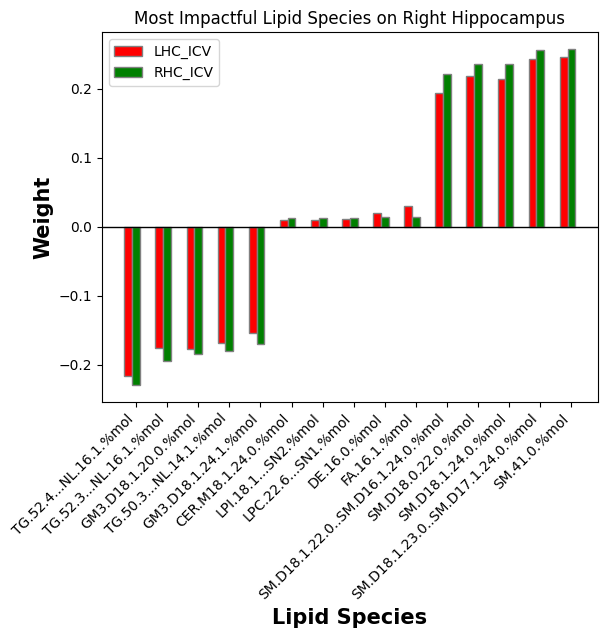

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

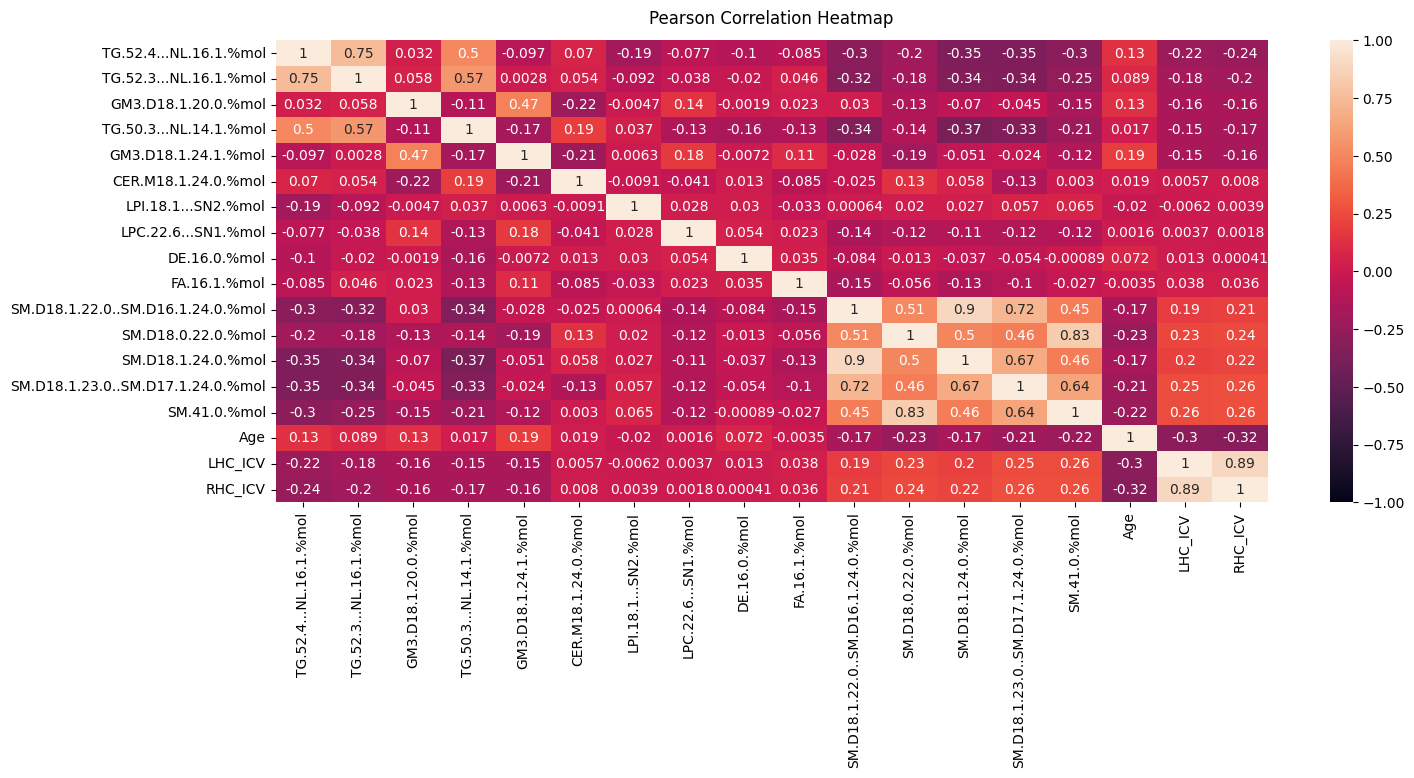

In [6]:
dataset = pd.read_csv(DATASET)
spearman_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'EXAMDATE'])
spearman_cor['Feature'] = None
spearman_cor['LHC_ICV'] = None
spearman_cor['RHC_ICV'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []

for i in dataset.columns[858:1639]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = spearmanr(lista,listaL)
    corrR, _ = spearmanr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)

spearman_cor['Feature'] = lista1
spearman_cor['LHC_ICV'] = lista2
spearman_cor['RHC_ICV'] = lista3

spearman_cor = spearman_cor.sort_values(by='RHC_ICV')

#----------------------------------------------------------------------------
total_rows = spearman_cor.shape[0]
middle_index = total_rows // 2
start_index = middle_index - 2  # Selecting 2 rows before the middle
end_index = middle_index + 2    # Selecting 2 rows after the middle
selected_rows = spearman_cor.iloc[start_index:end_index + 1]
#--------------------------------------------------------------------------------

combined_df = pd.concat([spearman_cor.head(5),selected_rows, spearman_cor.tail(5)])
display(combined_df)

#-----------------------------------------------------------------------------
# Make the plot
plt.bar(br1, combined_df['LHC_ICV'], color='r', width=0.25, edgecolor='grey', label='LHC_ICV')
plt.bar(br2, combined_df['RHC_ICV'], color='g', width=0.25, edgecolor='grey', label='RHC_ICV')

# Adding Xticks
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Lipid Species', fontweight='bold', fontsize=15)
plt.ylabel('Weight', fontweight='bold', fontsize=15)
plt.xticks(br2, combined_df['Feature'], rotation=45, ha='right')
plt.title('Most Impactful Lipid Species on Right Hippocampus')

plt.legend()
plt.show()
#-----------------------------------------------------------------------------------
dataset_top10 = pd.DataFrame()
for index, row in combined_df.iterrows():
    dataset_top10[row['Feature']] = dataset[row['Feature']]
dataset_top10['Age'] = dataset['Age']
dataset_top10['LHC_ICV'] = dataset['LHC_ICV']
dataset_top10['RHC_ICV'] = dataset['RHC_ICV']
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(dataset_top10.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


# Plots

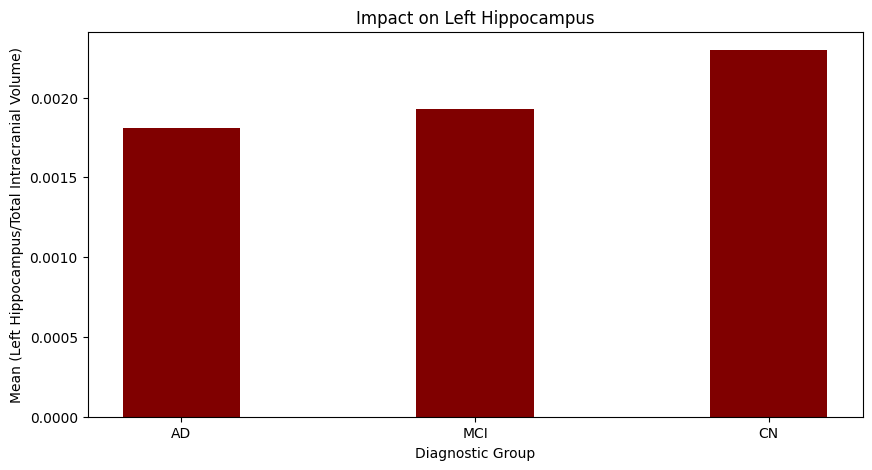

In [7]:
dataset = pd.read_csv(DATASET)
data1 = dataset['Left-Hippocampus']
data2 = dataset['Group']
fig = plt.figure(figsize = (10, 5))
data = pd.DataFrame()
ad,mci,cn = 0,0,0
c1,c2,c3 = 0,0,0,
for index, row in dataset.iterrows():
    if row['Group'] == 'AD': 
        ad+= row['LHC_ICV']
        c1+=1
    elif row['Group'] == 'MCI': 
        mci+= row['LHC_ICV']
        c2+=1
    elif row['Group'] == 'CN': 
        cn+= row['LHC_ICV']
        c3+=1
data = {'Group':['AD','MCI','CN'],
        'Mean Ratio':[(ad/c1),(mci/c2),(cn/c3)]}

# creating the bar plot
plt.bar(data['Group'], data['Mean Ratio'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Diagnostic Group")
plt.ylabel("Mean (Left Hippocampus/Total Intracranial Volume)")
plt.title("Impact on Left Hippocampus")
plt.show()

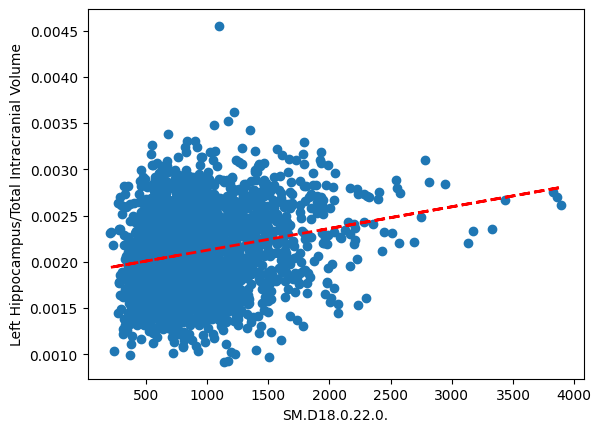

In [4]:
dataset = pd.read_csv(DATASET)
plt.scatter(dataset['SM.D18.0.22.0.'], dataset['LHC_ICV'])
a,b = np.polyfit(dataset['SM.D18.0.22.0.'],dataset['LHC_ICV'],1)
plt.plot(dataset['SM.D18.0.22.0.'],a*dataset['SM.D18.0.22.0.']+b, color='red', linestyle='--', linewidth=2)
plt.xlabel("SM.D18.0.22.0.")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.show()



### Age

Spearman Correlation: -0.26626290475781206
Pearson Correlation: -0.2759969631653015


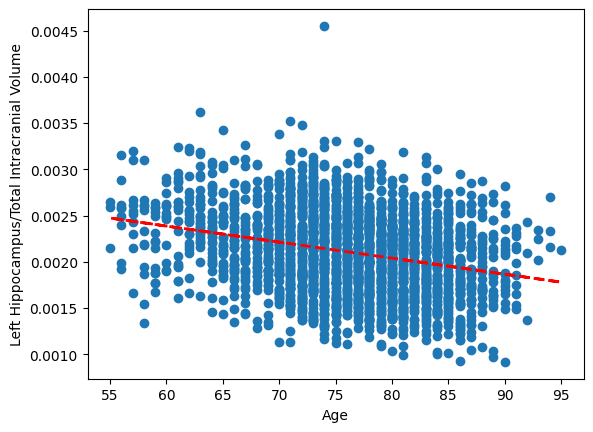

In [17]:
dataset = pd.read_csv(DATASET)
age = dataset['Age']
ratio = dataset['LHC_ICV']
corrS, _ = spearmanr(age,ratio)
corrP, _ = pearsonr(age,ratio)
print("Spearman Correlation:",corrS)
print("Pearson Correlation:",corrP)
a,b = np.polyfit(age,ratio,1)
plt.scatter(dataset['Age'], dataset['LHC_ICV'])
plt.plot(age,a*age+b, color='red', linestyle='--', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.show()

### RH Matrix

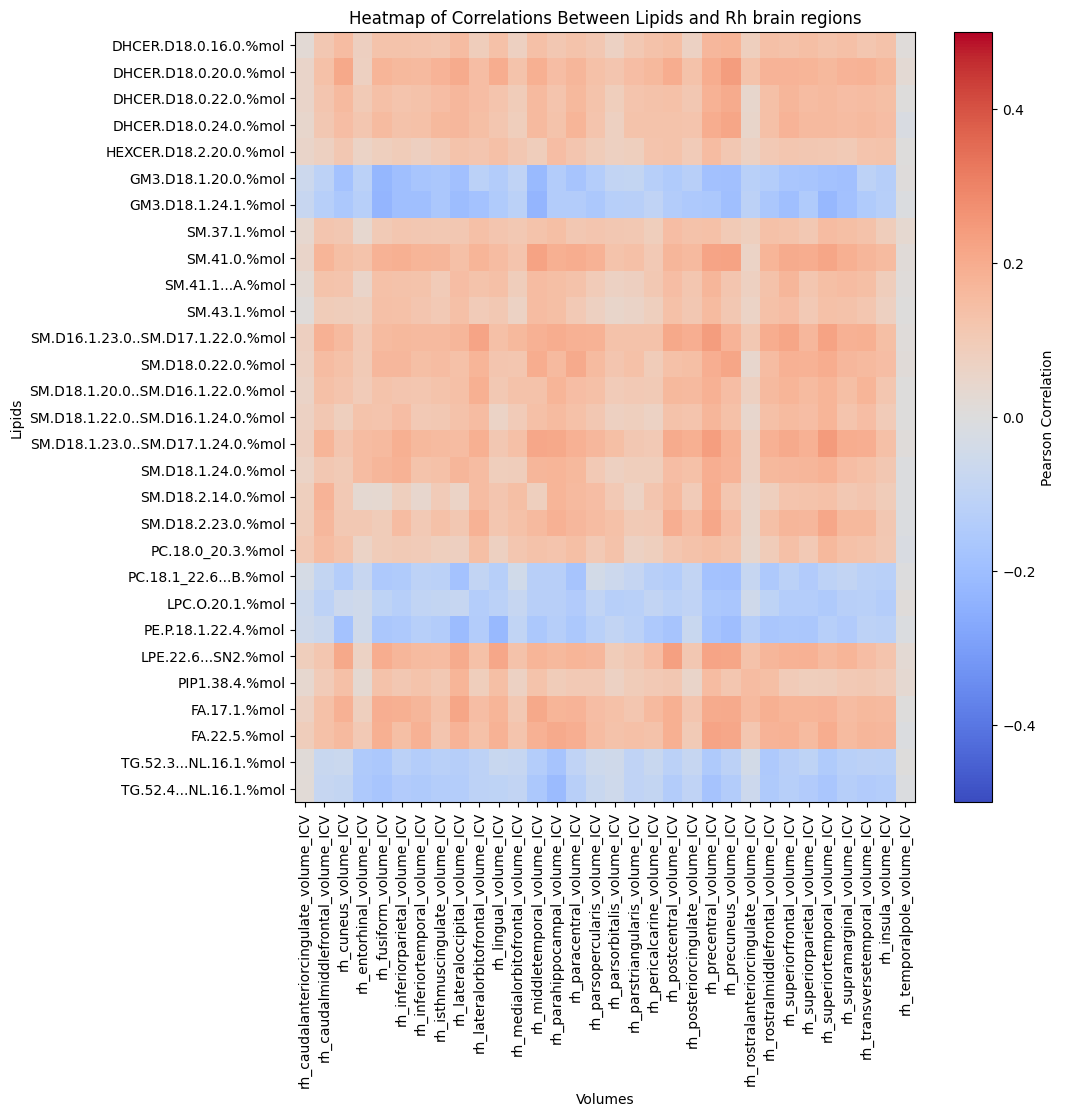

In [8]:
# Load the dataset
dataset = pd.read_csv('DatasetPro9.0.csv')

# Initialize a DataFrame for the table
table = pd.DataFrame()
table['Lipids'] = dataset.columns[923:1703]

# Add columns for correlations with NaN values
for i in dataset.columns[1703:1735]:
    table[i] = np.nan

# Calculate Pearson correlation coefficients
for i in dataset.columns[1703:1735]:
    for j in dataset.columns[923:1703]:
        corr, _ = pearsonr(dataset[j], dataset[i])
        table.at[table[table['Lipids'] == j].index[0], i] = corr

# Extract the correlation matrix values
correlation_matrix = table.drop(columns=['Lipids']).values

# Calculate the row-wise average of the correlation values
row_averages = np.nanmean(correlation_matrix, axis=1)

# Filter rows where the average absolute value is above 0.05
filtered_indices = (row_averages > 0.10) | (row_averages < -0.10)
filtered_table = table[filtered_indices]
filtered_correlation_matrix = filtered_table.drop(columns=['Lipids']).values

# Create the heatmap with filtered data
fig, ax = plt.subplots(figsize=(10, 10))
heatplot = ax.imshow(filtered_correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-0.5, vmax=0.5)

# Set the tick labels
ax.set_xticks(np.arange(len(dataset.columns[1703:1735])))
ax.set_yticks(np.arange(len(filtered_table)))
ax.set_xticklabels(dataset.columns[1703:1735], rotation=90)
ax.set_yticklabels(filtered_table['Lipids'])

# Set the tick spacing
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Set titles and labels
ax.set_title("Heatmap of Correlations Between Lipids and Rh brain regions")
ax.set_xlabel('Volumes')
ax.set_ylabel('Lipids')

# Add a color bar to the heatmap
cbar = fig.colorbar(heatplot, ax=ax)
cbar.set_label('Pearson Correlation')

# Show the plot
plt.show()

### LH Matrix

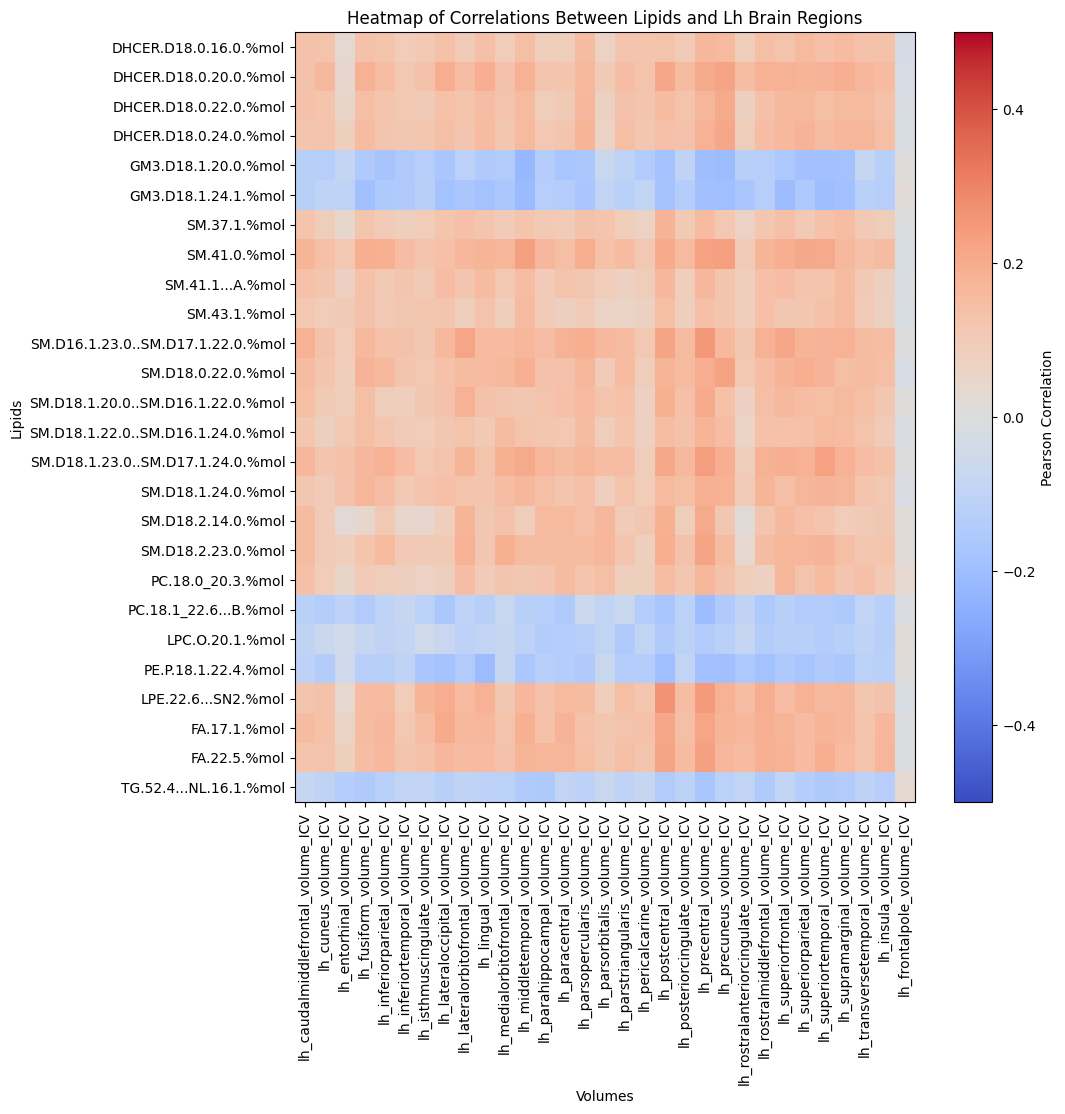

In [5]:
# Load the dataset
dataset = pd.read_csv('DatasetPro9.0.csv')

# Initialize a DataFrame for the table
table = pd.DataFrame()
table['Lipids'] = dataset.columns[923:1703]

# Add columns for correlations with NaN values
for i in dataset.columns[1736:1767]:
    table[i] = np.nan

# Calculate Pearson correlation coefficients
for i in dataset.columns[1736:1767]:
    for j in dataset.columns[923:1703]:
        corr, _ = pearsonr(dataset[j], dataset[i])
        table.at[table[table['Lipids'] == j].index[0], i] = corr

# Extract the correlation matrix values
correlation_matrix = table.drop(columns=['Lipids']).values

# Calculate the row-wise average of the correlation values
row_averages = np.nanmean(correlation_matrix, axis=1)

# Filter rows where the average absolute value is above 0.05
filtered_indices = (row_averages > 0.10) | (row_averages < -0.10)
filtered_table = table[filtered_indices]
filtered_correlation_matrix = filtered_table.drop(columns=['Lipids']).values

# Create the heatmap with filtered data
fig, ax = plt.subplots(figsize=(10, 10))
heatplot = ax.imshow(filtered_correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-0.5, vmax=0.5)

# Set the tick labels
ax.set_xticks(np.arange(len(dataset.columns[1736:1767])))
ax.set_yticks(np.arange(len(filtered_table)))
ax.set_xticklabels(dataset.columns[1736:1767], rotation=90)
ax.set_yticklabels(filtered_table['Lipids'])

# Set the tick spacing
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Set titles and labels
ax.set_title("Heatmap of Correlations Between Lipids and Lh Brain Regions")
ax.set_xlabel('Volumes')
ax.set_ylabel('Lipids')

# Add a color bar to the heatmap
cbar = fig.colorbar(heatplot, ax=ax)
cbar.set_label('Pearson Correlation')

# Show the plot
plt.show()

Normal Volumes

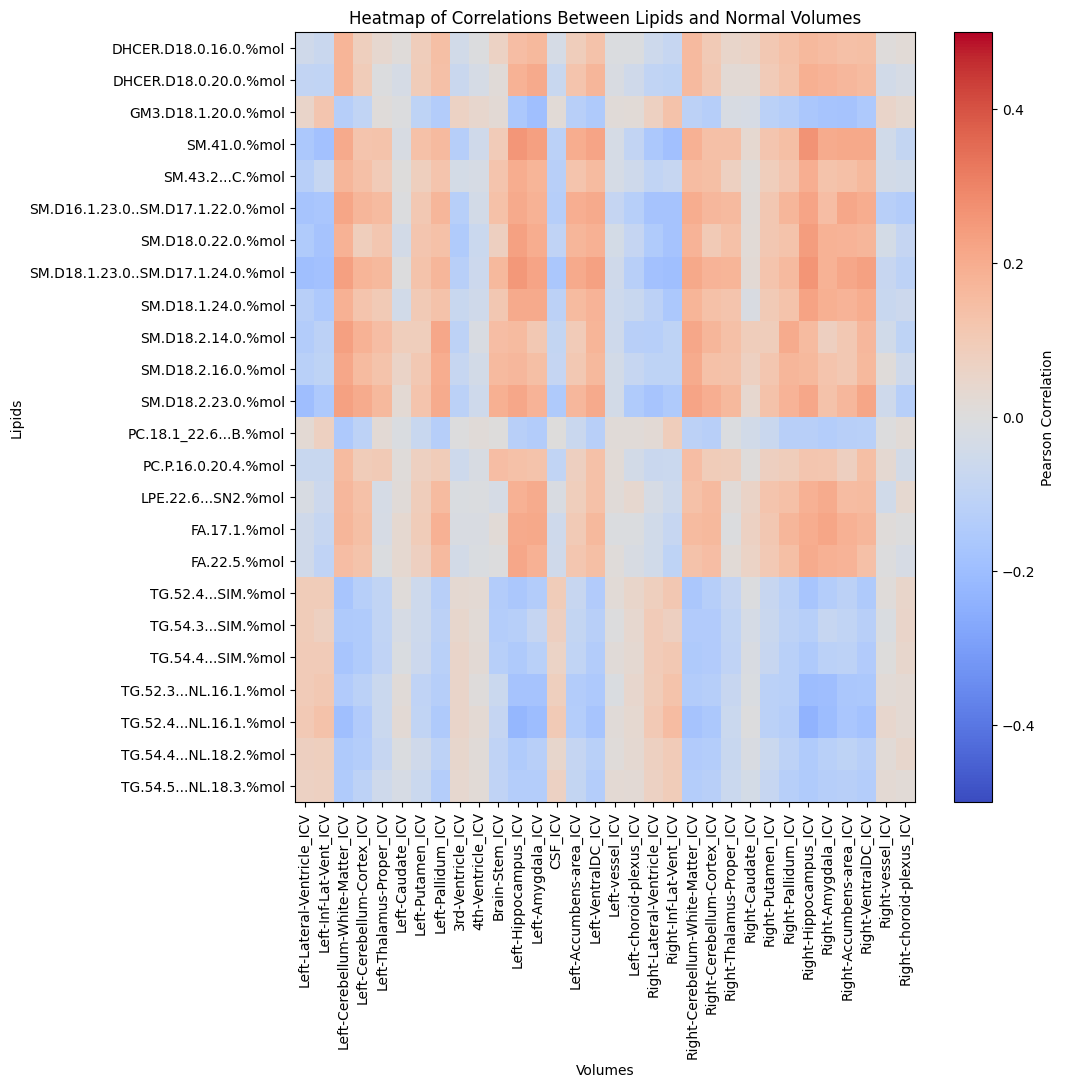

In [6]:
# Load the dataset
dataset = pd.read_csv('DatasetPro9.0.csv')

# Initialize a DataFrame for the table
table = pd.DataFrame()
table['Lipids'] = dataset.columns[923:1703]

# Add columns for correlations with NaN values
for i in dataset.columns[1767:1799]:
    table[i] = np.nan

# Calculate Pearson correlation coefficients
for i in dataset.columns[1767:1799]:
    for j in dataset.columns[923:1703]:
        corr, _ = pearsonr(dataset[j], dataset[i])
        table.at[table[table['Lipids'] == j].index[0], i] = corr

# Extract the correlation matrix values
correlation_matrix = table.drop(columns=['Lipids']).values

# Calculate the row-wise average of the correlation values
row_averages = np.nanmean(correlation_matrix, axis=1)

# Filter rows where the average absolute value is above 0.05
filtered_indices = (row_averages > 0.05) | (row_averages < -0.05)
filtered_table = table[filtered_indices]
filtered_correlation_matrix = filtered_table.drop(columns=['Lipids']).values

# Create the heatmap with filtered data
fig, ax = plt.subplots(figsize=(10, 10))
heatplot = ax.imshow(filtered_correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-0.5, vmax=0.5)

# Set the tick labels
ax.set_xticks(np.arange(len(dataset.columns[1767:1799])))
ax.set_yticks(np.arange(len(filtered_table)))
ax.set_xticklabels(dataset.columns[1767:1799], rotation=90)
ax.set_yticklabels(filtered_table['Lipids'])

# Set the tick spacing
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Set titles and labels
ax.set_title("Heatmap of Correlations Between Lipids and Normal Volumes")
ax.set_xlabel('Volumes')
ax.set_ylabel('Lipids')

# Add a color bar to the heatmap
cbar = fig.colorbar(heatplot, ax=ax)
cbar.set_label('Pearson Correlation')

# Show the plot
plt.show()

## Table Correlation for Lipid Classes with Selected Regions

### All Patients

In [3]:
dataset = pd.read_csv('DatasetPro10.0.csv')
regions = pd.read_csv('regions.csv')


filtered_regions = regions[regions['Check'] == 'x']

# Extract the 'Regions' column values into a list
regions = filtered_regions['Regions'].tolist()

table = pd.DataFrame()
table['Lipids'] = dataset.columns[1045:1080]

# Add columns for correlations with NaN values
for i in regions:
    table[i] = np.nan

# Calculate Pearson correlation coefficients
for i in regions:
    for j in dataset.columns[1045:1080]:
        corr, _ = pearsonr(dataset[j], dataset[i])
        table.at[table[table['Lipids'] == j].index[0], i] = corr

table.to_csv('Statistics/test/Table_LC_SR.csv', index=False)


### Other Patients

In [ ]:
dataset = pd.read_csv('DatasetPro10.0.csv')
regions = pd.read_csv('regions.csv')

filtered_regions = regions[regions['Check'] == 'x']
# print((dataset['Group'] == 'AD').sum())
# Extract the 'Regions' column values into a list
regions = filtered_regions['Regions'].tolist()

table = pd.DataFrame()
table['Lipids'] = dataset.columns[1045:1080]

# Add columns for correlations with NaN values
for i in regions:
    table[i] = np.nan

filtered_dataset = dataset[(dataset['Group'] == 'MCI') | (dataset['Group'] == 'LMCI') | (dataset['Group'] == 'EMCI') | (dataset['Group'] == 'SMC')]
# Calculate Pearson correlation coefficients
for i in regions:
    for j in dataset.columns[1045:1080]:
        corr, _ = pearsonr(filtered_dataset[j], filtered_dataset[i])
        table.at[table[table['Lipids'] == j].index[0], i] = corr

table.to_csv('Statistics/test/Table_LC_SR_MCI.csv', index=False)